## Clustering

In [18]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d  
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans

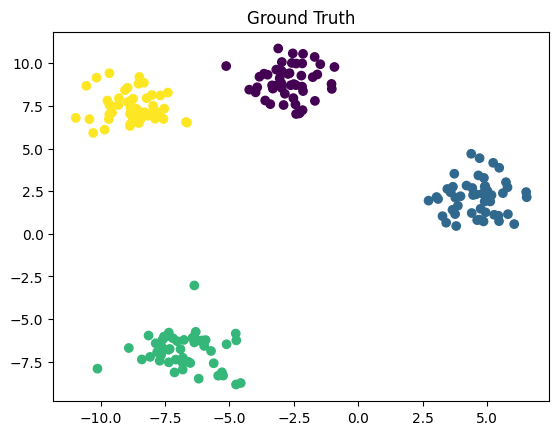

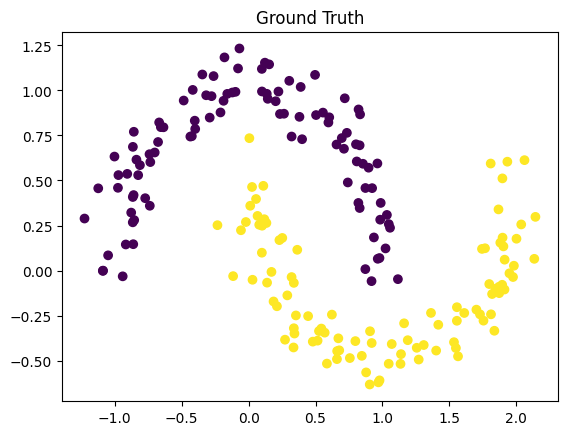

In [45]:
# Make some datasets
blobs_X, blobs_y, blob_centers = datasets.make_blobs(n_samples = 200, random_state = 42, centers = 4, return_centers=True, shuffle=True)

moons_X, moons_y = datasets.make_moons(n_samples = 200, random_state = 42, shuffle=True, noise=0.1)

# Plot the data
plt.scatter(blobs_X[:,0], blobs_X[:,1], c = blobs_y)
plt.title('Ground Truth')
plt.show()

plt.scatter(moons_X[:,0], moons_X[:,1], c = moons_y)
plt.title('Ground Truth')
plt.show()

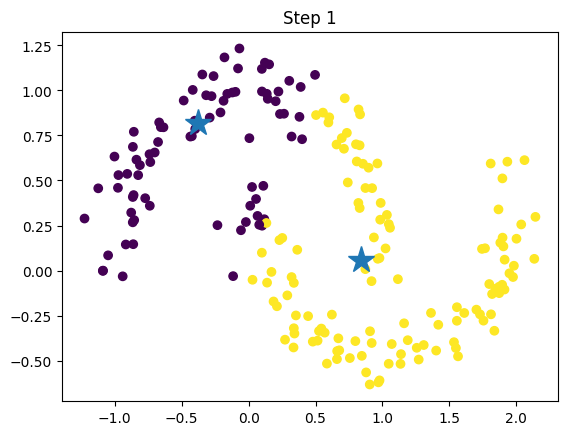

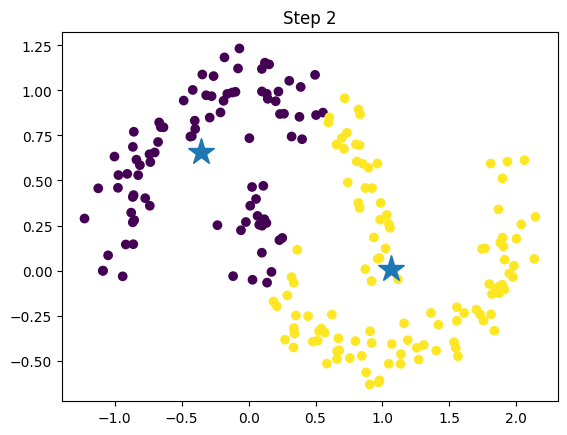

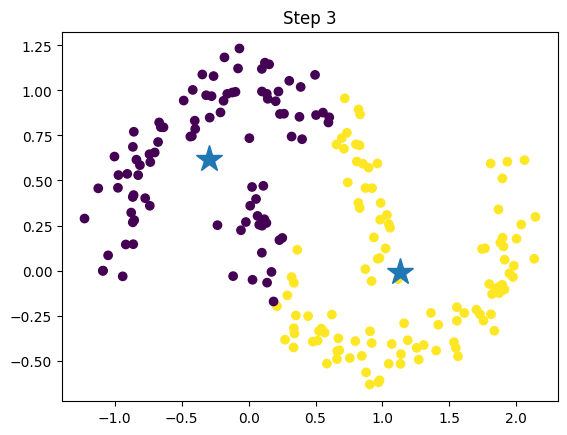

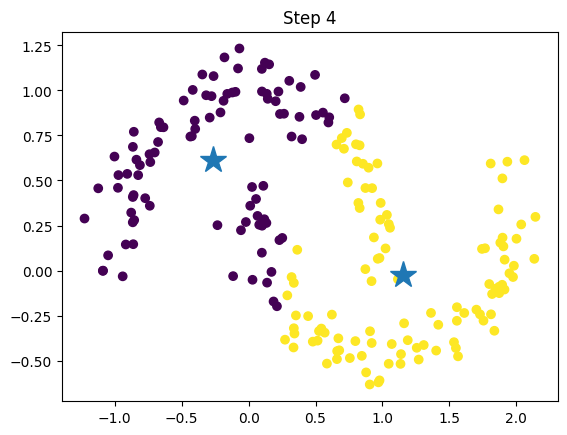

In [43]:
for i in range(1,5):
    # Performing clustering with random initialization
    model = KMeans(n_clusters=2, init="random", n_init=1, random_state = 15, max_iter = i)
    model.fit(moons_X)

    # Plot the predictions
    plt.scatter(moons_X[:,0], moons_X[:,1], c = model.labels_)
    plt.plot(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker = '*', ls='none', ms=20)
    plt.title(f'Step {i}')
    plt.show()

### One Go Version

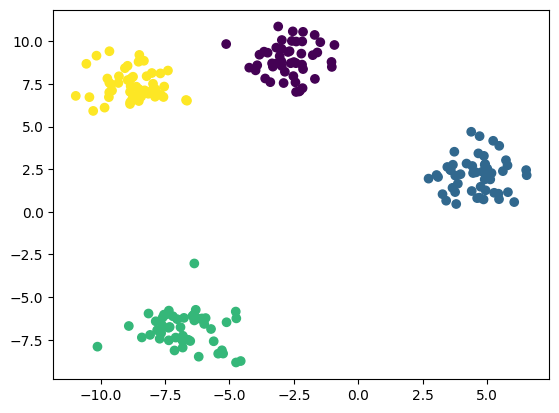

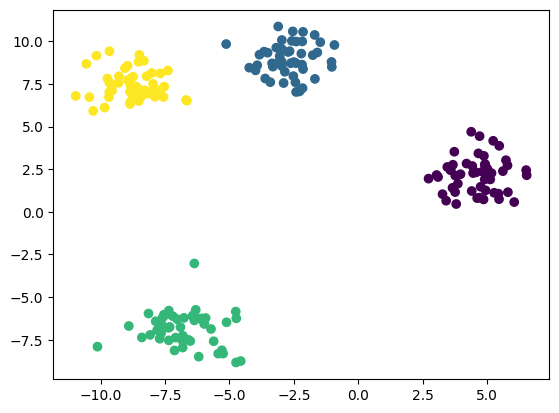

In [14]:
# Performing clustering with random initialization
model = KMeans(n_clusters=4, init="random", n_init=1, random_state = 42)
model.fit(blobs_X)

# Plot the ground truth data
plt.scatter(blobs_X[:,0], blobs_X[:,1], c = blobs_y)
plt.show()

# Plot the predictions
plt.scatter(blobs_X[:,0], blobs_X[:,1], c = model.labels_)
plt.show()

#### Improvements

1. We often run multiple iterations and pick the best one to combat bad results from poor random initialization.

2. We also use k-means++ instead of pure randomness to choose initial centers:

    - Choose 1st center at random from the given examples
    
    - Choose each successive center randomly from the remaining examples with probability proportional to the squarded distance of that example to its closest existing center

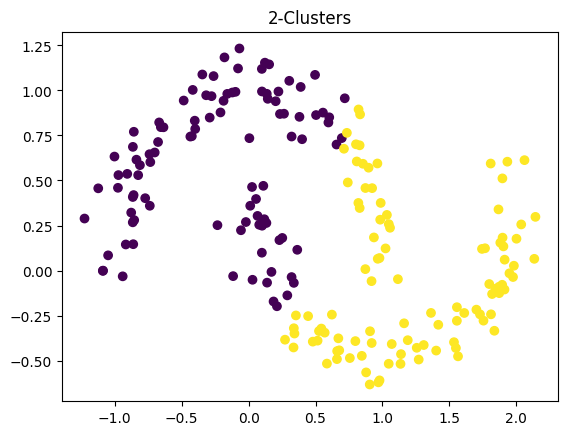

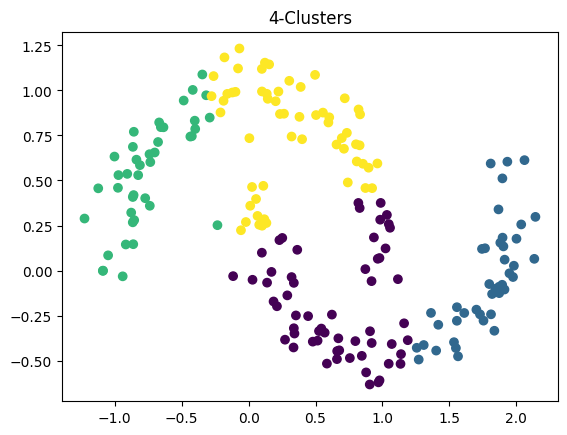

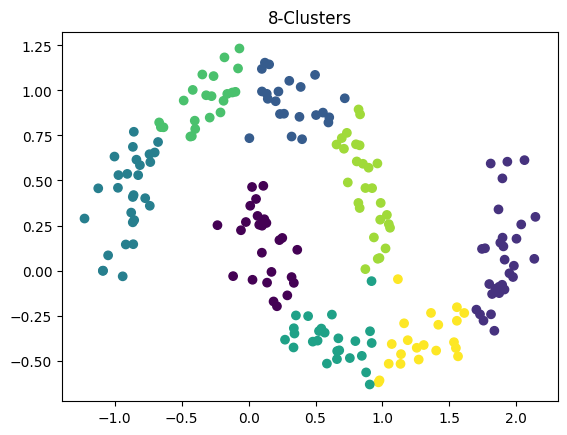

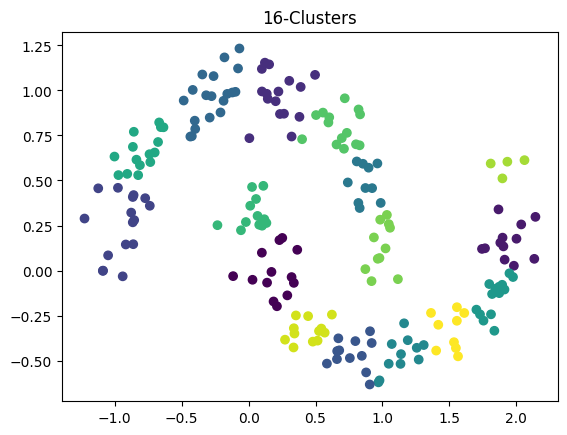

In [51]:
# Performing clustering on the moons dataset with the following cluster sizes [2,4,8,16] 
# Only parameters to pass is random_state = 42 and n_clusters
for i in [2,4,8,16]:
    model = KMeans(n_clusters=i, random_state = 42)
    model.fit(moons_X)

    # Plot the predictions with a title in the form 'K-Clusters'
    plt.scatter(moons_X[:,0], moons_X[:,1], c = model.labels_)
    plt.title(f'{i}-Clusters')
    plt.show()